Practice: Data Cleaning


In [54]:
import pandas as pd
import numpy as np 
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns



pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = None
pd.options.display.max_columns = None


In [55]:
# loading data
df= pd.read_csv('F:/all_data.csv',encoding='iso-8859-1')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161 entries, 0 to 2160
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      2158 non-null   float64
 1   FirstName       2158 non-null   object 
 2   LastName        2158 non-null   object 
 3   City            2158 non-null   object 
 4   Country         2158 non-null   object 
 5   Phone           2158 non-null   object 
 6   OrderID         2155 non-null   float64
 7   OrderDate       2155 non-null   object 
 8   OrderNumber     2155 non-null   float64
 9   TotalAmount     2155 non-null   float64
 10  ProductID       2157 non-null   float64
 11  ProductName     2157 non-null   object 
 12  UnitPrice       2157 non-null   float64
 13  Package         2157 non-null   object 
 14  IsDiscontinued  2157 non-null   object 
 15  SupplierID      2157 non-null   float64
 16  CompanyName     2157 non-null   object 
 17  ContactName     2157 non-null   o

In [57]:
#check data
df.sample(10)

,CustomerID,FirstName,LastName,City,Country,Phone,OrderID,OrderDate,OrderNumber,TotalAmount,ProductID,ProductName,UnitPrice,Package,IsDiscontinued,SupplierID,CompanyName,ContactName,City.1,Country.1,Phone.1,Fax
1024,87.00,Pirkko,Koskitalo,Oulu,Finland,981-443655,389.00,8/19/2013 0:00,"542,766.00",629.50,4.00,Chef Anton's Cajun Seasoning,22.00,48 - 6 oz jars,False,2.00,New Orleans Cajun Delights,Shelley Burke,New Orleans,USA,(100) 555-4822,NaN
1548,81.00,Anabela,Domingues,Sao Paulo,Brazil,(11) 555-2167,592.00,1/19/2014 0:00,"542,969.00",919.50,72.00,Mozzarella di Giovanni,34.80,24 - 200 g pkgs.,False,14.00,Formaggi Fortini s.r.l.,Elio Rossi,Ravenna,Italy,(0544) 60323,(0544) 60603
473,41.00,Annette,Roulet,Toulouse,France,61.77.61.10,178.00,1/24/2013 0:00,"542,555.00",480.00,55.00,Pâté chinois,24.00,24 boxes x 2 pies,False,25.00,Ma Maison,Jean-Guy Lauzon,Montréal,Canada,(514) 555-9022,NaN
41,65.00,Paula,Wilson,Albuquerque,USA,(505) 555-5939,15.00,7/22/2012 0:00,"542,392.00",624.80,7.00,Uncle Bob's Organic Dried Pears,30.00,12 - 1 lb pkgs.,False,3.00,Grandma Kelly's Homestead,Regina Murphy,Ann Arbor,USA,(313) 555-5735,(313) 555-3349
904,63.00,Horst,Kloss,Cunewalde,Germany,0372-035188,341.00,7/3/2013 0:00,"542,718.00","3,900.00",18.00,Carnarvon Tigers,62.50,16 kg pkg.,False,7.00,"Pavlova, Ltd.",Ian Devling,Melbourne,Australia,(03) 444-2343,(03) 444-6588
1383,20.00,Roland,Mendel,Graz,Austria,7675-3425,526.00,12/11/2013 0:00,"542,903.00","2,216.25",75.00,Rh?nbr?u Klosterbier,7.75,24 - 0.5 l bottles,False,12.00,Plutzer Lebensmittelgro?m?rkte AG,Martin Bein,Frankfurt,Germany,(069) 992755,NaN
1579,84.00,Mary,Saveley,Lyon,France,78.32.54.86,603.00,1/23/2014 0:00,"542,980.00",740.00,25.00,NuNuCa Nu?-Nougat-Creme,14.00,20 - 450 g glasses,False,11.00,Heli Sü?waren GmbH & Co. KG,Petra Winkler,Berlin,Germany,(010) 9984510,NaN
74,80.00,Miguel,Angel Paolino,México D.F.,Mexico,(5) 555-2933,29.00,8/8/2012 0:00,"542,406.00",420.00,10.00,Ikura,31.00,12 - 200 ml jars,False,4.00,Tokyo Traders,Yoshi Nagase,Tokyo,Japan,(03) 3555-5011,NaN
1460,84.00,Mary,Saveley,Lyon,France,78.32.54.86,559.00,12/31/2013 0:00,"542,936.00",572.10,2.00,Chang,19.00,24 - 12 oz bottles,False,1.00,Exotic Liquids,Charlotte Cooper,London,UK,(171) 555-2222,NaN
1895,10.00,Elizabeth,Lincoln,Tsawassen,Canada,(604) 555-4729,735.00,3/27/2014 0:00,"543,112.00","1,014.00",43.00,Ipoh Coffee,46.00,16 - 500 g tins,False,20.00,Leka Trading,Chandra Leka,Singapore,Singapore,555-8787,NaN


In [58]:
df.head()

,CustomerID,FirstName,LastName,City,Country,Phone,OrderID,OrderDate,OrderNumber,TotalAmount,ProductID,ProductName,UnitPrice,Package,IsDiscontinued,SupplierID,CompanyName,ContactName,City.1,Country.1,Phone.1,Fax
0,85.00,Paul,Henriot,Reims,France,26.47.15.10,1.00,7/4/2012 0:00,"542,378.00",440.00,11.00,Queso Cabrales,21.00,1 kg pkg.,False,5.00,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Oviedo,Spain,(98) 598 76 54,NaN
1,85.00,Paul,Henriot,Reims,France,26.47.15.10,1.00,7/4/2012 0:00,"542,378.00",440.00,42.00,Singaporean Hokkien Fried Mee,14.00,32 - 1 kg pkgs.,True,20.00,Leka Trading,Chandra Leka,Singapore,Singapore,555-8787,NaN
2,85.00,Paul,Henriot,Reims,France,26.47.15.10,1.00,7/4/2012 0:00,"542,378.00",440.00,72.00,Mozzarella di Giovanni,34.80,24 - 200 g pkgs.,False,14.00,Formaggi Fortini s.r.l.,Elio Rossi,Ravenna,Italy,(0544) 60323,(0544) 60603
3,79.00,Karin,Josephs,Münster,Germany,0251-031259,2.00,7/5/2012 0:00,"542,379.00","1,863.40",14.00,Tofu,23.25,40 - 100 g pkgs.,False,6.00,Mayumi's,Mayumi Ohno,Osaka,Japan,(06) 431-7877,NaN
4,79.00,Karin,Josephs,Münster,Germany,0251-031259,2.00,7/5/2012 0:00,"542,379.00","1,863.40",51.00,Manjimup Dried Apples,53.00,50 - 300 g pkgs.,False,24.00,"G'day, Mate",Wendy Mackenzie,Sydney,Australia,(02) 555-5914,(02) 555-4873


### issues :

*delete orders with nan values 

*Rename 'City.1 , Country.1 , Phon.1'Columns

*Change 'OrderDate' Typ into Date 

*Change ID Colums , and Order Number column to integer 

Get Orders NaN Rows


In [59]:
df[df.OrderID.isnull()]

,CustomerID,FirstName,LastName,City,Country,Phone,OrderID,OrderDate,OrderNumber,TotalAmount,ProductID,ProductName,UnitPrice,Package,IsDiscontinued,SupplierID,CompanyName,ContactName,City.1,Country.1,Phone.1,Fax
2155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.00,Stroopwafels,9.75,24 pieces,False,22.00,Zaanse Snoepfabriek,Dirk Luchte,Zaandam,Netherlands,(12345) 1212,(12345) 1210
2156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.00,DataScience,50.00,1,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2157,92.00,Ali,Ali,Cairo,Egypt,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2158,22.00,Diego,Roel,Madrid,Spain,(91) 555 94 44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2159,57.00,Marie,Bertrand,Paris,France,(1) 42.34.22.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00,DSClub,AEmad,Alex,Egypt,11111,11111


In [60]:
# Delete Orders NaN rows
df.dropna(subset='OrderID',inplace=True)

In [61]:
# Rename Columns
df.rename(columns={'City.1':'suppCity','Country.1':'suppCountry','Phone.1':'suppPhone'}, inplace=True)

In [62]:
#Change OrderDate and ID Columns Type to Date,integer
df.OrderDate=pd.to_datetime(df.OrderDate)

In [63]:
# Wrangle Function

def wrangle (filename, encoding = None, dropna_columnnames = None, change_column_name= None, date_column= None, remove_duplicated_rows_columnsname = None):
    # Loading Data from csv file
    df = pd.read_csv(filename, encoding= encoding)

    ### Get Orders NaN Rows
    df.dropna(subset= dropna_columnnames, inplace=True)

    # Rename Columns
    df = df.rename(columns= change_column_name)
    
    # Change OrderDate and ID Columns type to Date, integer
    df[date_column] = pd.to_datetime(df[date_column])    

    #Drop dupliacted rows
    df = df.drop_duplicates(subset= remove_duplicated_rows_columnsname)

       
    #Strip and lowercase columns names
    df.columns = df.columns.str.strip().str.lower()
    
    return df

In [64]:
orders = wrangle('F:/all_data.csv', encoding= 'latin-1' , dropna_columnnames= ['OrderID'], change_column_name= {'City.1' : 'SuppCity', 'Country.1' : 'SuppCountry', 'Phone.1' : 'Supp_Phone'}, date_column= 'OrderDate', remove_duplicated_rows_columnsname= ['OrderID'])

for cols in orders.columns:
    if 'ID' in cols or 'OrderNumber' in cols:
         orders[cols] = orders[cols].astype(int)

orders = orders[['customerid', 'firstname', 'lastname', 'city', 'country', 'orderid', 'ordernumber', 'orderdate', 'totalamount' ]]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 2130
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customerid   830 non-null    float64       
 1   firstname    830 non-null    object        
 2   lastname     830 non-null    object        
 3   city         830 non-null    object        
 4   country      830 non-null    object        
 5   orderid      830 non-null    float64       
 6   ordernumber  830 non-null    float64       
 7   orderdate    830 non-null    datetime64[ns]
 8   totalamount  830 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 64.8+ KB


EDA


Univariate Analysis

In [65]:
orders.describe()['totalamount']

count      830.00
mean     1,631.88
min         12.50
25%        480.00
50%      1,015.90
75%      2,028.65
max     17,250.00
std      1,990.61
Name: totalamount, dtype: float64

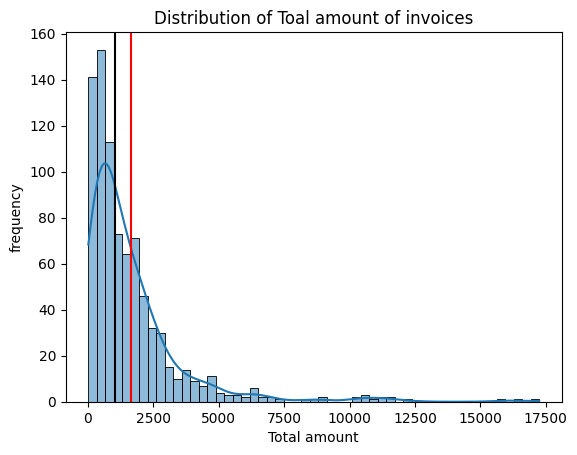

In [66]:
#data shape
sns.histplot(data=orders,x='totalamount',kde=True )
plt.title('Distribution of Toal amount of invoices')
plt.xlabel('Total amount')
plt.ylabel('frequency')
plt.axvline(orders.totalamount.mean(),color='red')
plt.axvline(orders.totalamount.median(),color='black');

Mean < Median <<>> Left-skewed (Negative skew) 


In [67]:
min= orders.totalamount.min()
q1 =orders.totalamount.quantile(0.25)
q2 =orders.totalamount.median()
q3 =orders.totalamount.quantile(0.75)

IQR=q3-q1
LB =q1-(1.5*IQR)
UB =q3+(1.5*IQR)

print ( f'min = {min}, q1 = {q1} , q2 = {q2} , q3 = {q3} , IQR = {IQR} , LB = {LB} , UB = {UB}' )

min = 12.5, q1 = 480.0 , q2 = 1015.9 , q3 = 2028.65 , IQR = 1548.65 , LB = -1842.9750000000004 , UB = 4351.625


In [68]:
px.box(data_frame=orders, x='totalamount')

In [69]:
orders[orders.totalamount>15000].count()

customerid     3
firstname      3
lastname       3
city           3
country        3
orderid        3
ordernumber    3
orderdate      3
totalamount    3
dtype: int64

In [70]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 2130
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customerid   830 non-null    float64       
 1   firstname    830 non-null    object        
 2   lastname     830 non-null    object        
 3   city         830 non-null    object        
 4   country      830 non-null    object        
 5   orderid      830 non-null    float64       
 6   ordernumber  830 non-null    float64       
 7   orderdate    830 non-null    datetime64[ns]
 8   totalamount  830 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 64.8+ KB


In [71]:
orders.city.value_counts()

city
London             46
Rio de Janeiro     34
Sao Paulo          31
Boise              31
Graz               30
Cunewalde          28
México D.F.        28
Br?cke             19
Cork               19
Lule?              18
Albuquerque        18
San Crist?bal      18
Marseille          17
Buenos Aires       16
München            15
Oulu               15
Frankfurt a.M.     15
Brandenburg        14
Seattle            14
Toulouse           14
Tsawassen          14
Barquisimeto       14
Montréal           13
Lisboa             13
Charleroi          12
Portland           12
Reggio Emilia      12
I. de Margarita    12
?rhus              11
Eugene             11
Strasbourg         11
Lyon               10
Bergamo            10
Stuttgart          10
Genève             10
Sevilla            10
Anchorage          10
Cowes              10
Salzburg           10
K?ln               10
Campinas            9
Lander              9
Resende             9
Bern                8
Madrid              8
Helsi

In [72]:
px.bar(data_frame=orders.city.value_counts(), title='distrbution of city')

In [73]:
px.bar(data_frame=orders.country.value_counts(), title='distrbution of Countries')

In [74]:
px.pie(data_frame=orders, names='country', title='Relative Frequency of COUNTRIES sales')

من خلال التحليل الاولي نرى ان لندن هي المدينة التي تمتلك اكبر حصة من شراء منتجاتنا بواقع 46 فاتورة . وان الولايات المتحدة و المانيا هما اكثر  الدول لي شرائ منتجانتات بواقع 121 فاتورة .بنسبة %14.6  
من اجمالي مبيعاتنا

### Bivariate Analysis

Countries vs. Total amount

Cities vs.Total amount

In [75]:
orders.groupby('country',as_index=False)['totalamount'].sum().sort_values('totalamount',ascending=False)

,country,totalamount
19,USA,"263,566.98"
8,Germany,"244,640.63"
1,Austria,"139,496.63"
3,Brazil,"114,968.48"
7,France,"85,498.76"
20,Venezuela,"60,814.89"
18,UK,"60,616.51"
16,Sweden,"59,523.70"
9,Ireland,"57,317.39"
4,Canada,"55,334.10"


In [76]:
def plots(columnname, Top10=False):

    # Sum of totalamount by column
    prop = orders.groupby(columnname, as_index=False)['totalamount'].sum()

    # Proportion of total amount
    prop['proportion'] = (prop['totalamount'] / orders['totalamount'].sum()) * 100

    # Sort by proportion descending
    prop = prop.sort_values('proportion', ascending=False)

    # Describe
    print("Describe of all Total amount values:")
    print(prop['totalamount'].describe())

    # Top 10 option
    if Top10 == True:
        prop = prop.head(10)

    # Plots
    fig1 = px.bar(
        data_frame=prop,
        x=columnname,
        y='totalamount'
    )

    fig2 = px.pie(
        data_frame=prop,
        names=columnname,
        values='totalamount'
    )

    fig1.show()
    fig2.show()


In [77]:
plots('country', Top10=True)

Describe of all Total amount values:
count        21.00
mean     64,498.03
std      72,328.73
min       3,531.95
25%      19,431.89
50%      35,134.98
75%      60,814.89
max     263,566.98
Name: totalamount, dtype: float64


In [78]:
orders.head()

,customerid,firstname,lastname,city,country,orderid,ordernumber,orderdate,totalamount
0,85.00,Paul,Henriot,Reims,France,1.00,"542,378.00",2012-07-04,440.00
3,79.00,Karin,Josephs,Münster,Germany,2.00,"542,379.00",2012-07-05,"1,863.40"
5,34.00,Mario,Pontes,Rio de Janeiro,Brazil,3.00,"542,380.00",2012-07-08,"1,813.00"
8,84.00,Mary,Saveley,Lyon,France,4.00,"542,381.00",2012-07-08,670.80
11,76.00,Pascale,Cartrain,Charleroi,Belgium,5.00,"542,382.00",2012-07-09,"3,730.00"


### Orderdate VS. Total  Amount

In [79]:
date_total=orders[['orderdate','totalamount']]
date_total=date_total.set_index('orderdate')

In [80]:
px.line(data_frame=date_total)

### OrderDate and Country 

In [81]:
date_country = orders[['orderdate', 'country']]
date_country = date_country.set_index('orderdate')
date_country = date_country.country.resample(rule='1M').nunique()
date_country.head()


C:\Users\DELL\AppData\Local\Temp\ipykernel_13948\1405426202.py:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



orderdate
2012-07-31    11
2012-08-31    11
2012-09-30    11
2012-10-31    13
2012-11-30    11
Freq: ME, Name: country, dtype: int64

In [82]:
px.line(data_frame=date_country,y='country')

In [83]:
cust_orders = {
'Fullname' : orders.firstname +'' + orders.lastname,
'totalamount' :orders.totalamount 
}
cust_orders = pd.DataFrame (cust_orders)
cust_orders.head()

,Fullname,totalamount
0,PaulHenriot,440.00
3,KarinJosephs,"1,863.40"
5,MarioPontes,"1,813.00"
8,MarySaveley,670.80
11,PascaleCartrain,"3,730.00"


In [84]:
fig= px.bar(cust_orders.groupby('Fullname') ['totalamount'].count().sort_values(ascending=False).head (10), text_auto= True, title='No. of orders per customer',
labels={'fullname': 'Full Name', 'value': 'Frequency'})
#Customize aspect
fig.update_traces (marker_color='rgb(158, 202, 225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6, textposition='outside')

In [85]:
fig= px.bar(cust_orders.groupby('Fullname') ['totalamount'].sum().sort_values(ascending=False).head (10), text_auto= True, title='No. of orders per customer',
labels={'fullname': 'Full Name', 'value': 'Frequency'})
#Customize aspect
fig.update_traces (marker_color='rgb(158, 202, 225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6, textposition='outside')

### Multivariate Analysis

In [86]:
orders.head()

,customerid,firstname,lastname,city,country,orderid,ordernumber,orderdate,totalamount
0,85.00,Paul,Henriot,Reims,France,1.00,"542,378.00",2012-07-04,440.00
3,79.00,Karin,Josephs,Münster,Germany,2.00,"542,379.00",2012-07-05,"1,863.40"
5,34.00,Mario,Pontes,Rio de Janeiro,Brazil,3.00,"542,380.00",2012-07-08,"1,813.00"
8,84.00,Mary,Saveley,Lyon,France,4.00,"542,381.00",2012-07-08,670.80
11,76.00,Pascale,Cartrain,Charleroi,Belgium,5.00,"542,382.00",2012-07-09,"3,730.00"


country with Orderdate and totalamount

we interested in knwing the  number of countries and the grand total amount of them per month 

In [87]:
mulivar=orders[['orderdate','country','totalamount']]
mulivar=mulivar.set_index('orderdate')
mulivar.head()


,country,totalamount
orderdate,,
2012-07-04,France,440.00
2012-07-05,Germany,"1,863.40"
2012-07-08,Brazil,"1,813.00"
2012-07-08,France,670.80
2012-07-09,Belgium,"3,730.00"


In [88]:
mulivar=mulivar.resample('1M').agg({'country':'nunique','totalamount':'sum'})
mulivar.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13948\697202781.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



,country,totalamount
orderdate,,
2012-07-31,11,"30,192.10"
2012-08-31,11,"26,609.40"
2012-09-30,11,"27,636.00"
2012-10-31,13,"41,203.60"
2012-11-30,11,"49,704.00"


In [91]:
fig=px.bar(data_frame=mulivar,x=mulivar.index,y=round(mulivar.totalamount,0),color=mulivar.country,text_auto=True,title='grand total amount of all countries per month',labels={'orders':' order date','y':'total amount'})
fig.update_traces(textposition='outside')
fig.update_layout(title_x=0.5)
fig.show()

السببب في انخفاض مبيعات استراليا  في 2013، ارتفاع أسعار العقارات السكنية بنسبة 9.8٪ على المستوى الوطني , وبسبب ارتفاع ضريبة الكربون وارتفاع أسعار الطاقة , مما ادى الى قلة المبيعات مما يعني أن المستهلكين لم يمتلكوا القدرة الشرائية القوية  في هذه الفترة , وفي اواخر العام زادت النسبة الشرائية بسبب تخفيض الفائدة لدعم النمو في هذا الوقت

### Grand total amount of each Country per month

In [93]:
mutlivar=orders[['orderdate','country','totalamount']]

In [94]:
mulivar.head()

,country,totalamount
orderdate,,
2012-07-31,11,"30,192.10"
2012-08-31,11,"26,609.40"
2012-09-30,11,"27,636.00"
2012-10-31,13,"41,203.60"
2012-11-30,11,"49,704.00"


In [97]:
mutlivar.orderdate=mutlivar.orderdate.dt.to_period('M')

C:\Users\DELL\AppData\Local\Temp\ipykernel_13948\2565943367.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [98]:
mutlivar.head()

,orderdate,country,totalamount
0,2012-07,France,440.00
3,2012-07,Germany,"1,863.40"
5,2012-07,Brazil,"1,813.00"
8,2012-07,France,670.80
11,2012-07,Belgium,"3,730.00"


In [101]:
mutlivar=mutlivar.groupby(['orderdate','country'],as_index=False)['totalamount'].sum().sort_values(by='totalamount',ascending=False)
mutlivar.head()

,orderdate,country,totalamount
311,2014-04,USA,"34,221.48"
255,2014-01,USA,"27,594.45"
166,2013-07,USA,"26,022.30"
263,2014-02,Germany,"24,760.46"
300,2014-04,Germany,"22,584.49"


In [102]:
mutlivar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, 311 to 228
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype    
---  ------       --------------  -----    
 0   orderdate    322 non-null    period[M]
 1   country      322 non-null    object   
 2   totalamount  322 non-null    float64  
dtypes: float64(1), object(1), period[M](1)
memory usage: 10.1+ KB


In [103]:
mutlivar.orderdate=mutlivar.orderdate.astype('datetime64[ns]')

In [104]:
mutlivar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, 311 to 228
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   orderdate    322 non-null    datetime64[ns]
 1   country      322 non-null    object        
 2   totalamount  322 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 10.1+ KB


In [105]:
px.scatter(data_frame=mutlivar,x=mutlivar.orderdate,y='totalamount',color='country',size='totalamount')